# Supporting Information for Villas Bôas et al., 2021 - Geophysical Research Letters

### A simple model for illustrating some issues that arise from 1D sampling and/or averaging a 2D surface wave field

We will start looking at the surface elevation of a monochromatic sine wave propagating in the x-y plane

$$
\eta(x, y) = a \sin{(k_x x + k_y y)},
$$

where here x is the across-track (or range) direction, y is the along-track (or azimuth) direction. For this exercise we will consider a wave that has omnidirectional wavenumber 

$$K = (k_x^2 + k_y^2)^{1/2},$$

where here we are choosing 

$$ \lambda = \frac{2\pi}{K} = 50\ m.$$

We will look at two cases:

a. The wave propagates exactly in the along-track (y) direction. This implies $k_x=0$ and $k_y = 2\pi/50m$

b.  The wave propagates with an angle of $70^\circ$ relative to the along-track direction. This implies $k_x\approx 2\pi/53m$, $k_y\approx 2\pi/146m$.

Note that in **both** cases $K = 2\pi/50m$.

Now, for cases (a) and (b) we will do the following:

1. Sample the 2D field in the along-track direction (y) at $x=0$

2. Compute the across-track average (average across the x-axis)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [2]:
nx = 500 # number of across-track points 
ny = 1000 # number of along-track points
x = np.arange(0, nx, 1) # across-track coordinate
y = np.arange(0, ny, 1) # along-track coordinate
xx, yy = np.meshgrid(x, y) # grid
K = 2*pi/50 # wavenumber

In [3]:
# Wave propagating exactly along-track
theta_perp = np.radians(90)
kx_perp = K*cos(theta_perp)
ky_perp = K*sin(theta_perp)
eta_perp = sin(kx_perp*xx + ky_perp*yy)

# Wave propagating at 70 degres
theta_slant = np.radians(20)
kx_slant = K*cos(theta_slant)
ky_slant = K*sin(theta_slant)
eta_slant = sin(kx_slant*xx + ky_slant*yy)

print('==== Orthogonal wave =====')
print('across-track wavelength = {}'.format(2*pi/kx_perp))
print('along-track wavelength = {}'.format(2*pi/ky_perp))
print('wavelength = {}\n'.format(2*pi/(kx_perp**2 + ky_perp**2)**.5))
print('==== Slanted wave =====')
print('across-track wavelength = {}'.format(2*pi/kx_slant))
print('along-track wavelength = {}'.format(2*pi/ky_slant))
print('wavelength = {}\n'.format(2*pi/(kx_slant**2 + ky_slant**2)**.5))

==== Orthogonal wave =====
across-track wavelength = 8.165619676597683e+17
along-track wavelength = 49.99999999999999
wavelength = 49.99999999999999

==== Slanted wave =====
across-track wavelength = 53.2088886237956
along-track wavelength = 146.19022000815434
wavelength = 49.99999999999999



### 2D wave field and respecive along-track "slices"
The field on the left is referred to as "orthogonal" ($\eta_{\perp}$ in the manuscript) and the one on the right as 
"slanted" ($\eta_{\theta}$  in the manuscript).

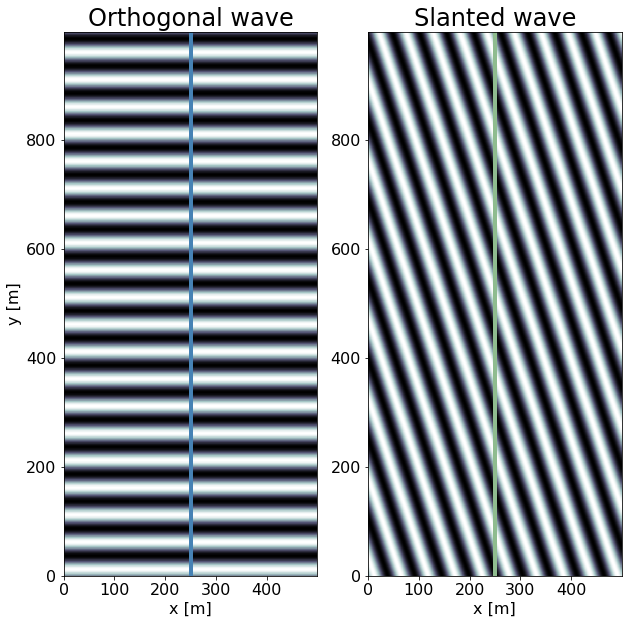

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.pcolormesh(x, y, eta_perp, cmap='bone')
plt.axvline(x=250, color='steelblue', lw=4)
plt.xlabel('x [m]', fontsize=16)
plt.ylabel('y [m]', fontsize=16)
plt.title("Orthogonal wave", fontsize=24)
plt.subplot(122)
plt.pcolormesh(x, y, eta_slant, cmap='bone')
plt.axvline(x=250, color='darkseagreen', lw=4)
plt.xlabel('x [m]', fontsize=16)
plt.title("Slanted wave", fontsize=24)
plt.savefig('../figs/slant_wave_2D.png', dpi=150, bbox_inches='tight', facecolor="w" )

### Now, we look at the along-track slices and the across-track averages

A few things to note:

- As expected, if the wave crests are exactly orthogonal to along-track direction, taking an along-track slice (blue) is the same as doing the cross-track average (red) and it doesn't chance the wave.
- For the slanted wave, taking an along-track slice (green) preserves the amplitude of the wave, but changes the wavelength, resulting in a longer wave
- For the slanted wave, computing the across-track average (orange), drastically reduces the amplitude of the wave **and** changes the wavelength, resulting in a longer wave


In [5]:
eta_perp_atk = eta_perp[:, nx//2] # alongtrack slice 
eta_slant_atk = eta_slant[:, nx//2] # alongtrack slice 
eta_perp_bar = eta_perp.mean(axis=1) # across-track average 
eta_slant_bar = eta_slant.mean(axis=1) # across-track average

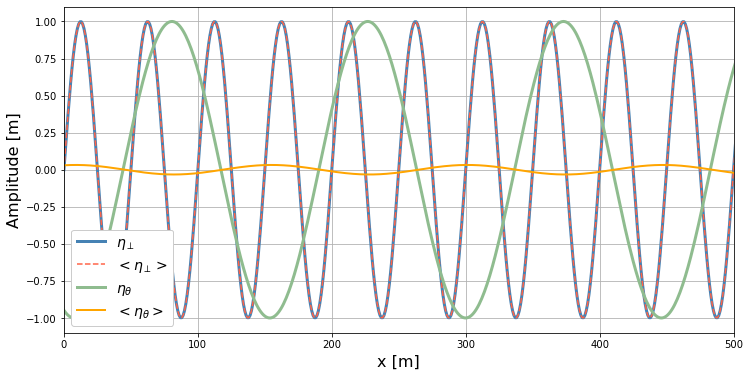

In [9]:
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(y, eta_perp_atk, label='$\eta_{\perp}$', color='steelblue', lw=3)
plt.plot(y, eta_perp_bar, color='tomato', ls='--', label='$<\eta_{\perp}>$')
plt.plot(y, eta_slant_atk, label='$\eta_{\\theta}$', color='darkseagreen', lw=3)
plt.plot(y, eta_slant_bar, lw=2, label='$<\eta_{\\theta}>$', color='orange')
plt.xlim([0, 500])
plt.legend(loc=3, framealpha=1, fontsize=14)
plt.grid()
plt.xlabel('x [m]', fontsize=16)
plt.ylabel('Amplitude [m]', fontsize=16)
plt.savefig('../figs/slant_wave_slice.png', dpi=150, bbox_inches='tight', facecolor="w" )

### Using the analytical solution in Section 3, equation 4 on the manuscript we can check how that compares with the numerical results.

In [7]:
# a = 1 # amplitude
# sol = -a/(kx*nx) * (cos(kx*nx + ky*y) - cos(ky*y))
# slice_sol = sin(kx*x[nx//2] + ky*y)

a = 1 # amplitude
sol = 2*a/(kx_slant*nx) * sin(kx_slant*nx/2)*sin(kx_slant*nx/2 + ky_slant*y)
slice_sol = sin(kx_slant*x[nx//2] + ky_slant*y)

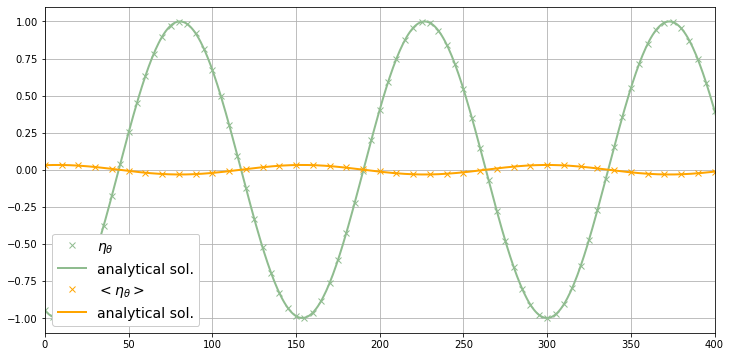

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(y[::5], eta_slant_atk[::5], 'x', label='$\eta_{\\theta}$', color='darkseagreen')
plt.plot(y, slice_sol, lw=2, color='darkseagreen', label='analytical sol.')
plt.plot(y[::10], eta_slant_bar[::10], 'x', label='$<\eta_{\\theta}>$', color='orange')
plt.plot(y, sol, lw=2, color='orange', label='analytical sol.')
plt.xlim([0, 400])
plt.legend(loc=3, framealpha=1, fontsize=14)
plt.grid()